**Machine Learning-Based Anomaly Detection**

In [ ]:
!pip install tensorflow numpy matplotlib


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.model_selection import train_test_split
import cv2


In [ ]:
print("Upload your training images (normal UI screenshots):")
uploaded_files = files.upload()

# Load and preprocess images
images = []
for filename in uploaded_files.keys():
    img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
    img = cv2.resize(img, (128, 128))                # Resize to 128x128
    images.append(img)

# Convert to NumPy array and normalize pixel values to [0, 1]
images = np.array(images) / 255.0
images = np.expand_dims(images, axis=-1)  # Add channel dimension

# Split into training and validation sets
train_data, val_data = train_test_split(images, test_size=0.2, random_state=42)

print(f"Training data shape: {train_data.shape}")
print(f"Validation data shape: {val_data.shape}")


Upload your training images (normal UI screenshots):


Saving geeks_for_geeks_baseline.png to geeks_for_geeks_baseline.png
Saving python_org_baseline.png to python_org_baseline.png
Saving wikipedia_baseline.png to wikipedia_baseline.png
Training data shape: (2, 128, 128, 1)
Validation data shape: (1, 128, 128, 1)


**Define the Autoencoder Model**

In [ ]:
# Define the model architecture
input_img = Input(shape=(128, 128, 1))  # Input shape matches image dimensions

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Compile the model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Model summary
autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128, 128, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 16)          │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 64, 64, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 128, 128, 1)         │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,193 (47.63 KB)

 Trainable params: 12,193 (47.63 KB)

 Non-trainable params: 0 (0.00 B)

**Train the Autoencoder**

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.7019 - val_loss: 0.6941
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - loss: 0.6938 - val_loss: 0.6865
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step - loss: 0.6903 - val_loss: 0.6798
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 0.6872 - val_loss: 0.6716
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 0.6835 - val_loss: 0.6605
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 0.6787 - val_loss: 0.6467
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 0.6727 - val_loss: 0.6302
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - loss: 0.6654 - val_loss: 0.6104
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step - loss: 0.6567 - val_loss: 0.5869
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 0.6462 - val_loss: 0.5593
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - loss: 0.6337 - val_loss: 0.5277
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - loss: 0.6191 - val_loss:

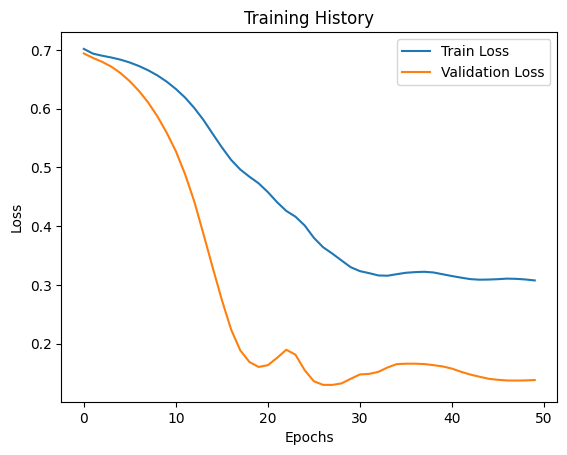

In [ ]:
# Train the model
history = autoencoder.fit(
    train_data, train_data,
    epochs=50,
    batch_size=8,
    validation_data=(val_data, val_data)
)

# Plot training history
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


**Test Anomaly Detection**

Upload a test image (anomalous or normal):


Saving geeks_for_geeks_anomaly.png to geeks_for_geeks_anomaly.png
Saving python_org_anomaly.png to python_org_anomaly.png
Saving wikipedia_anomaly.png to wikipedia_anomaly.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


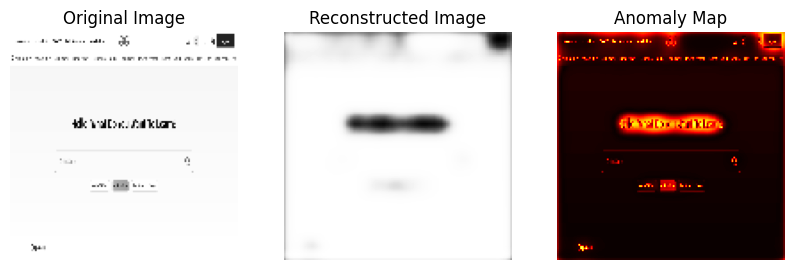

In [ ]:
print("Upload a test image (anomalous or normal):")
test_file = files.upload()
test_img = cv2.imread(list(test_file.keys())[0], cv2.IMREAD_GRAYSCALE)
test_img = cv2.resize(test_img, (128, 128)) / 255.0  # Resize and normalize
test_img = np.expand_dims(test_img, axis=(0, -1))    # Reshape for model

# Reconstruct the test image
reconstructed_img = autoencoder.predict(test_img)

# Compute anomaly map (absolute difference)
anomaly_map = np.abs(test_img - reconstructed_img)[0, :, :, 0]

# Plot results
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(test_img[0, :, :, 0], cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Reconstructed Image")
plt.imshow(reconstructed_img[0, :, :, 0], cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Anomaly Map")
plt.imshow(anomaly_map, cmap='hot')
plt.axis('off')
plt.show()


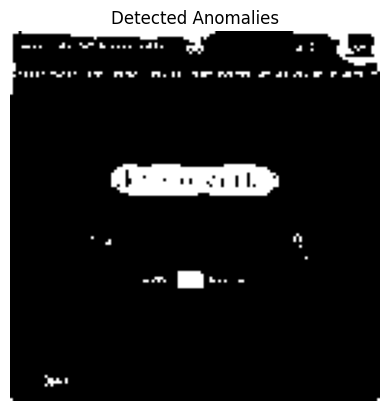

In [ ]:
# Thresholding to highlight anomalies
threshold = 0.2  # Adjust based on sensitivity
anomalies = (anomaly_map > threshold).astype(np.uint8) * 255

# Display anomalies
plt.title("Detected Anomalies")
plt.imshow(anomalies, cmap='gray')
plt.axis('off')
plt.show()


**Fine-Tuning the Autoencoder**

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Dropout

# Define enhanced Autoencoder
input_img = Input(shape=(128, 128, 1))  # Adjust input size if needed

# Encoder
x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Dropout(0.2)(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Dropout(0.2)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
autoencoder.fit(train_data, train_data, epochs=100, batch_size=8, validation_data=(val_data, val_data))


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.6876 - val_loss: 0.6414
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step - loss: 0.6586 - val_loss: 0.5775
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step - loss: 0.6219 - val_loss: 0.4815
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step - loss: 0.5781 - val_loss: 0.3652
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step - loss: 0.5385 - val_loss: 0.2526
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step - loss: 0.5239 - val_loss: 0.1875
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step - loss: 0.5427 - val_loss: 0.1761
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - loss: 0.5464 - val_loss: 0.1866
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - loss: 0.5301 - val_loss: 0.2131
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step - loss: 0.5123 - val_loss: 0.2503
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step - loss: 0.5027 - val_loss: 0.2881
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step - loss: 0.5011

**Evaluate and Optimize Threshold**

In [ ]:
import os
import cv2
import numpy as np

# Define the path to your images in Google Drive
normal_images_path = '/content/drive/MyDrive/screenshots/normal'  # Adjust path accordingly
anomalous_images_path = '/content/drive/MyDrive/screenshots/anomalies'  # Adjust path accordingly

# Function to load images from a folder
def load_images(image_folder):
    images = []
    for filename in os.listdir(image_folder):
        if filename.endswith('.png') or filename.endswith('.jpg'):  # Check for image formats
            img_path = os.path.join(image_folder, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load image as grayscale
            img = cv2.resize(img, (128, 128))  # Resize images to 128x128
            images.append(img)
    images = np.array(images) / 255.0  # Normalize the pixel values
    images = np.expand_dims(images, axis=-1)  # Add channel dimension (for grayscale)
    return images

# Load normal and anomalous images
normal_images = load_images(normal_images_path)
anomalous_images = load_images(anomalous_images_path)

# Check the shape of the loaded images
print(f'Normal images shape: {normal_images.shape}')
print(f'Anomalous images shape: {anomalous_images.shape}')


Normal images shape: (3, 128, 128, 1)
Anomalous images shape: (3, 128, 128, 1)


In [ ]:
# Prepare labels (0 for normal, 1 for anomalous)
normal_labels = np.zeros(normal_images.shape[0])  # Label 0 for normal
anomalous_labels = np.ones(anomalous_images.shape[0])  # Label 1 for anomalous

# Combine normal and anomalous data and labels
all_images = np.concatenate([normal_images, anomalous_images], axis=0)
all_labels = np.concatenate([normal_labels, anomalous_labels], axis=0)

print(f'All images shape: {all_images.shape}')
print(f'All labels shape: {all_labels.shape}')


All images shape: (6, 128, 128, 1)
All labels shape: (6,)


In [ ]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(all_images, all_labels, test_size=0.2, random_state=42)

print(f'Training data shape: {train_images.shape}')
print(f'Test data shape: {test_images.shape}')


Training data shape: (4, 128, 128, 1)
Test data shape: (2, 128, 128, 1)


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam

# Define Autoencoder architecture
input_img = Input(shape=(128, 128, 1))  # Input shape matches your preprocessed image shape

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Compile model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')

# Train model using normal images (i.e., images with label 0)
autoencoder.fit(train_images, train_images, epochs=50, batch_size=4, validation_split=0.1)

# Save the trained model in the native Keras format (.keras)
autoencoder.save('/content/drive/MyDrive/screenshots/ui_anomaly_autoencoder.keras')



Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.6907 - val_loss: 0.6534
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 934ms/step - loss: 0.6852 - val_loss: 0.6279
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step - loss: 0.6802 - val_loss: 0.5945
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step - loss: 0.6735 - val_loss: 0.5574
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - loss: 0.6662 - val_loss: 0.5163
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step - loss: 0.6582 - val_loss: 0.4716
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step - loss: 0.6500 - val_loss: 0.4192
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - loss: 0.6419 - val_loss: 0.3665
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - loss: 0.6347 - val_loss: 0.3225
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - loss: 0.6295 - val_loss: 0.2935
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - loss: 0.6242 - val_loss: 0.2845
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - loss: 0.6165 - val_loss:

In [ ]:
# Evaluate the model on test data
reconstructed_images = autoencoder.predict(test_images)

# Calculate reconstruction errors
reconstruction_errors = np.mean(np.abs(test_images - reconstructed_images), axis=(1, 2, 3))

# Set a threshold for anomaly detection (e.g., 0.1)
threshold = 0.1
predicted_labels = (reconstruction_errors > threshold).astype(int)

# Evaluate accuracy
from sklearn.metrics import accuracy_score, classification_report
print(f'Accuracy: {accuracy_score(test_labels, predicted_labels)}')
print(f'Classification Report: \n{classification_report(test_labels, predicted_labels)}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step
Accuracy: 1.0
Classification Report: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the saved model
model_path = '/content/drive/MyDrive/screenshots/ui_anomaly_autoencoder.keras'
autoencoder = load_model(model_path)

# Function to preprocess images (resize, grayscale, normalize)
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load image as grayscale
    img = cv2.resize(img, (128, 128))  # Resize image to 128x128
    img = img / 255.0  # Normalize pixel values to [0, 1]
    img = np.expand_dims(img, axis=-1)  # Add channel dimension
    return np.expand_dims(img, axis=0)  # Add batch dimension

# Example of loading and preprocessing images (both normal and anomalous)
image_path = '/content/drive/MyDrive/screenshots/normal'
preprocessed_image = preprocess_image(image_path)

# Predict using the autoencoder model
reconstructed_img = autoencoder.predict(preprocessed_image)

# Compute the anomaly (difference) between the original and reconstructed image
anomaly_map = np.abs(preprocessed_image[0] - reconstructed_img[0])

# Visualize the anomaly heatmap
plt.imshow(anomaly_map, cmap='hot')
plt.title("Anomaly Heatmap")
plt.axis("off")
plt.show()


error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the saved model
model_path = '/content/drive/MyDrive/screenshots/ui_anomaly_autoencoder.keras'
autoencoder = load_model(model_path)

# Folder containing the images
folder_path = '/content/drive/MyDrive/screenshots/normal/'

# List all images in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith('.png')]  # Update the extension if needed

# Function to preprocess images (resize, grayscale, normalize)
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load image as grayscale
    img = cv2.resize(img, (128, 128))  # Resize image to 128x128
    img = img / 255.0  # Normalize pixel values to [0, 1]
    img = np.expand_dims(img, axis=-1)  # Add channel dimension
    return np.expand_dims(img, axis=0)  # Add batch dimension


In [ ]:
# Loop through each image in the folder
for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)

    # Preprocess the image
    preprocessed_image = preprocess_image(image_path)

    # Predict using the autoencoder model
    reconstructed_img = autoencoder.predict(preprocessed_image)

    # Compute the anomaly (difference) between the original and reconstructed image
    anomaly_map = np.abs(preprocessed_image[0] - reconstructed_img[0])

    # Compute average anomaly value for logging (you can adjust the threshold later)
    avg_anomaly = np.mean(anomaly_map)

    # If anomaly is detected (based on a threshold)
    if avg_anomaly > 0.1:  # Adjust this threshold based on your needs
        print(f"Anomaly detected in {image_file}")

        # Visualize the anomaly heatmap
        plt.imshow(anomaly_map, cmap='hot')
        plt.title(f"Anomaly Heatmap for {image_file}")
        plt.axis("off")
        plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [ ]:
import pandas as pd

# Function to log anomalies
def log_anomaly(image_path, avg_anomaly):
    log_entry = {
        "image_path": image_path,
        "average_anomaly": avg_anomaly
    }
    return log_entry

# Initialize a list to hold log entries
log_entries = []

# Loop through images and log anomalies
for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)

    # Preprocess the image
    preprocessed_image = preprocess_image(image_path)

    # Predict using the autoencoder model
    reconstructed_img = autoencoder.predict(preprocessed_image)

    # Compute the anomaly (difference) between the original and reconstructed image
    anomaly_map = np.abs(preprocessed_image[0] - reconstructed_img[0])

    # Compute average anomaly value for logging
    avg_anomaly = np.mean(anomaly_map)

    # If anomaly is detected, log it
    if avg_anomaly > 0.1:  # Adjust this threshold as needed
        print(f"Anomaly detected in {image_file}")

        # Log the anomaly
        anomaly_log = log_anomaly(image_path, avg_anomaly)
        log_entries.append(anomaly_log)

        # Visualize the anomaly heatmap
        plt.imshow(anomaly_map, cmap='hot')
        plt.title(f"Anomaly Heatmap for {image_file}")
        plt.axis("off")
        plt.show()

# Save the anomaly logs to a CSV file
log_df = pd.DataFrame(log_entries)
log_df.to_csv('/content/drive/MyDrive/your_folder/anomaly_log.csv', index=False)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [ ]:
# Visualize anomalies with bounding boxes (you can update based on anomaly location)
def visualize_with_bounding_box(image_path, anomaly_map):
    img = cv2.imread('/content/drive/MyDrive/your_folder/anomaly_log.csv')
    x, y, w, h = (50, 50, 100, 100)  # Example location, replace with real coordinates
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 2)
    anomaly_heatmap = cv2.applyColorMap(np.uint8(anomaly_map * 255), cv2.COLORMAP_HOT)
    overlay_img = cv2.addWeighted(img, 0.7, anomaly_heatmap, 0.3, 0)
    plt.imshow(cv2.cvtColor(overlay_img, cv2.COLOR_BGR2RGB))
    plt.title("Anomaly Detection with Bounding Box")
    plt.axis("off")
    plt.show()


In [ ]:
!git clone https://github.com/sukeerthi1999/ui-anomaly-detection.git




Cloning into 'ui-anomaly-detection'...
fatal: could not read Username for 'https://github.com': No such device or address


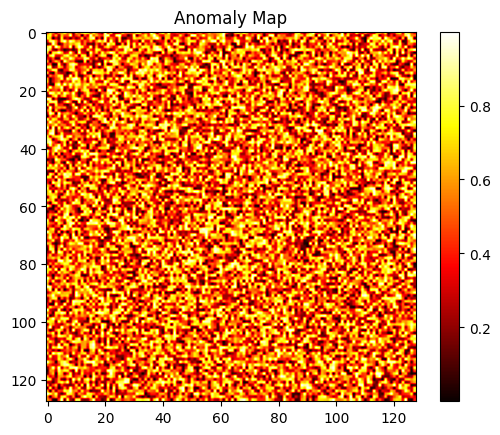

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Example anomaly map
anomaly_map = np.random.random((128, 128))  # Replace with your actual anomaly map

# Display the anomaly map
plt.imshow(anomaly_map, cmap='hot')
plt.colorbar()
plt.title("Anomaly Map")

# Save the anomaly map as an image
plt.savefig('anomaly_map.png')
